<a href="https://colab.research.google.com/github/GOPIKA-S-S/LLM/blob/main/2348518_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Load the fine-tuned model
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Set the model to evaluation mode
model.eval()


# Function to make predictions and return sentiment label
def predict(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        # Get model outputs
        outputs = model(**inputs)

        logits = outputs.logits

        # Apply softmax to get probabilities
        probabilities = torch.softmax(logits, dim=-1)

        # Get the predicted class (0 for negative, 1 for positive)
        predicted_class = torch.argmax(probabilities, dim=1).item()

        # Map the class to the corresponding label
        label = "positive" if predicted_class == 1 else "negative"

    return label, probabilities


text = "The performance by the lead actor was simply outstanding and very moving!"

# Get predictions and label
label, probabilities = predict(text)
print("Predicted Sentiment:", label)
print("Probabilities:", probabilities)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Predicted Sentiment: positive
Probabilities: tensor([[1.2192e-04, 9.9988e-01]])


2. Develop a Python script for handling multimodal inputs.

Logits per image: tensor([[28.1251, 23.2240]])
Logits per text: tensor([[28.1251],
        [23.2240]])
Most similar text for the given image: 'A photo of a cat'


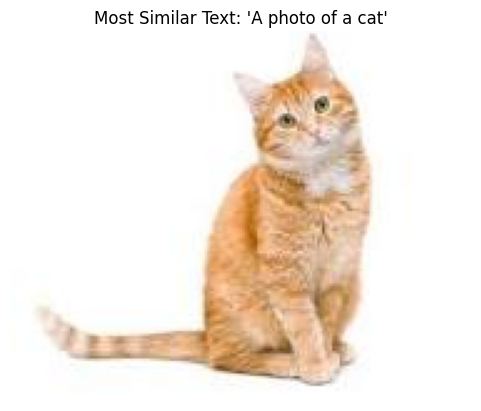

In [3]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the CLIP model and processor
model_name_or_path = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name_or_path)
processor = CLIPProcessor.from_pretrained(model_name_or_path)

# Example inputs
text_inputs = ["A photo of a cat", "Picture of a dog"]
image_path = "/content/image.jpeg"


image = Image.open(image_path)

# Preprocess the inputs
inputs = processor(text=text_inputs, images=image, return_tensors="pt", padding=True)

# Forward pass through the model
with torch.no_grad():
    outputs = model(**inputs)

 # Image-to-text similarity
logits_per_image = outputs.logits_per_image
# Text-to-image similarity
logits_per_text = outputs.logits_per_text

# Print the similarity scores
print(f"Logits per image: {logits_per_image}")
print(f"Logits per text: {logits_per_text}")

# Get the most similar text for the given image
most_similar_text_index = logits_per_image.argmax()
most_similar_text = text_inputs[most_similar_text_index]

print(f"Most similar text for the given image: '{most_similar_text}'")

# Display the image
plt.imshow(image)
plt.title(f"Most Similar Text: '{most_similar_text}'")
plt.axis('off')
plt.show()
